In [1]:
#IMporting all required modules
import pickle
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
import cv2

In [5]:
#Reading closed and open eyes and converting them to grayscale image
import os
classes=['closed_eyes','open_eyes']
def create_training_Data():
    for category in classes:
        path = os.path.join('G:\Mtec_Final_year_project_research paper\datasets\mrlEyes_2018_01 - Copy - Copy',category)
        class_num=classes.index(category)
        for img in os.listdir(path):
            img_array=cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
            backtorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
            new_array = cv2.resize(backtorgb,(150,150))
            training_data.append(new_array/255.0)
            label.append(class_num)

In [6]:
training_data=[]
label=[]
create_training_Data()

In [7]:
#total image data
len(training_data)

16096

0


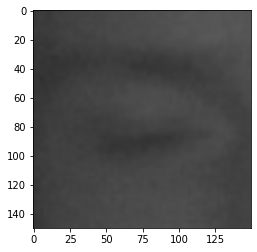

In [8]:
#Randomly printing one image
plt.imshow(training_data[0])
print(label[0])

In [9]:
#Shuffling the data 
from sklearn.utils import shuffle
X, y = shuffle(training_data, label, random_state=0)

1


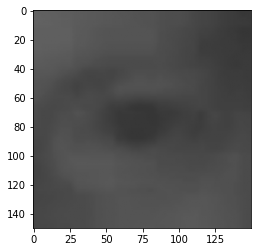

In [10]:
plt.imshow(X[456])
print(y[456])

In [11]:
len(X)

16096

In [14]:
training_data=[]

In [15]:
#Converting data into numpy array
X = np.array(X)
y= np.array(y)

In [16]:
len(X)

16096

In [18]:
#Shape of input image
X.shape

(16096, 150, 150, 3)

In [19]:
y.shape

(16096,)

# CNN

In [17]:
#Downloading Inception model wiht input size as 150x150
basemodel = InceptionV3(weights="imagenet", include_top=False, input_tensor=Input(shape=(150, 150, 3)))
basemodel.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 74, 74, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 74, 74, 32)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 74, 74, 32)   0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [20]:
headModel = basemodel.output   #Output layer of basemodel
headModel = Flatten(name="flatten")(headModel)  # Flatten layer
headModel = Dense(64, activation="relu")(headModel)  # First hidden layer
headModel = Dense(1, activation="sigmoid")(headModel)  # Output layer

# Making layers of basemodel as untrainable layers 
for layer in basemodel.layers:
    layer.trainable = False

model = Model(inputs=basemodel.input, outputs=headModel) #Final model
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 74, 74, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 74, 74, 32)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 74, 74, 32)   0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [21]:
#Compiling the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [24]:
#Training the model with validation split of 20%
H = model.fit(X,y,epochs=40,validation_split=0.2)

Train on 12876 samples, validate on 3220 samples
Epoch 1/40
12876/12876 [==============================] - 286s 22ms/sample - loss: 0.1520 - accuracy: 0.9481 - val_loss: 0.3392 - val_accuracy: 0.8503
Epoch 2/40
12876/12876 [==============================] - 255s 20ms/sample - loss: 0.0628 - accuracy: 0.9793 - val_loss: 1.1319 - val_accuracy: 0.7068
Epoch 3/40
12876/12876 [==============================] - 258s 20ms/sample - loss: 0.0564 - accuracy: 0.9801 - val_loss: 0.4661 - val_accuracy: 0.8298
Epoch 4/40
12876/12876 [==============================] - 260s 20ms/sample - loss: 0.0442 - accuracy: 0.9844 - val_loss: 0.4919 - val_accuracy: 0.8208
Epoch 5/40
12876/12876 [==============================] - 261s 20ms/sample - loss: 0.0408 - accuracy: 0.9863 - val_loss: 0.3609 - val_accuracy: 0.8658
Epoch 6/40
12876/12876 [==============================] - 261s 20ms/sample - loss: 0.0405 - accuracy: 0.9858 - val_loss: 0.2793 - val_accuracy: 0.8904
Epoch 7/40
12876/12876 [=====================

In [25]:
#Saving the model
model.save('drowsiness_model_inception_1.h5')

[INFO] Training curve with loss and accuracy********


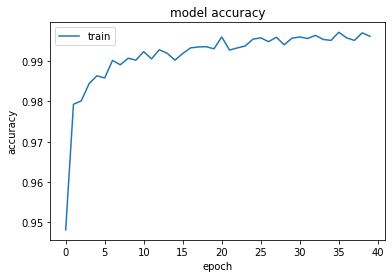

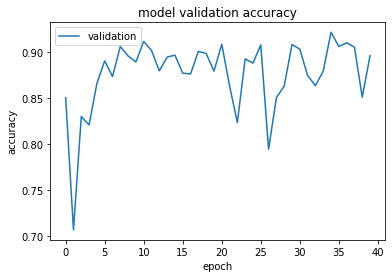

In [26]:
 print("[INFO] Training curve with loss and accuracy********")
#  "Training Accuracy"
plt.plot(H.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

# "Validation Accuracy"
plt.plot(H.history['val_accuracy'])
plt.title('model validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['validation'], loc='upper left')
plt.show()

# Prediction

##### 

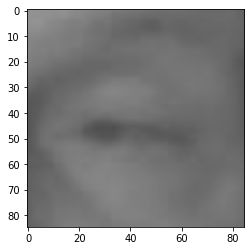

In [29]:
# input_img = cv2.imread('G:\Mtec_Final_year_project_research paper\datasets\mrlEyes_2018_01\open_eyes\s0003_00679_0_0_1_0_0_01.png', cv2.IMREAD_GRAYSCALE)
input_img = cv2.imread('s0023_00025_0_0_0_0_1_01.png', cv2.IMREAD_GRAYSCALE)
# img_array=cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
input_image_backtorgb = cv2.cvtColor(input_img,cv2.COLOR_GRAY2RGB)
new_input_array = cv2.resize(input_image_backtorgb,(150,150))
new_input_array = np.array(new_input_array).reshape(-1,150,150,3)
new_image = new_input_array/255.0
plt.imshow(input_image_backtorgb)

In [45]:
type(X[0][0][0][0])

numpy.float64

In [46]:
type(new_image[0][0][0][0])

numpy.float64

In [30]:
prediction = model.predict(new_image)
prediction

array([[0.8626613]], dtype=float32)

In [ ]:
new_input_array.shape

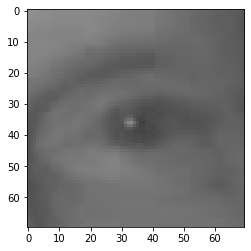

In [33]:
# input_img = cv2.imread('G:\Mtec_Final_year_project_research paper\datasets\mrlEyes_2018_01\open_eyes\s0003_00679_0_0_1_0_0_01.png', cv2.IMREAD_GRAYSCALE)
input_img = cv2.imread('s0023_00300_0_0_1_0_1_01.png', cv2.IMREAD_GRAYSCALE)
# img_array=cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
input_image_backtorgb = cv2.cvtColor(input_img,cv2.COLOR_GRAY2RGB)
new_input_array = cv2.resize(input_image_backtorgb,(150,150))
new_input_array = np.array(new_input_array).reshape(-1,150,150,3)
new_image = new_input_array/255.0
plt.imshow(input_image_backtorgb)

In [34]:
prediction = model.predict(new_image)
prediction

array([[1.]], dtype=float32)

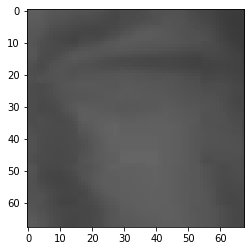

In [35]:
# input_img = cv2.imread('G:\Mtec_Final_year_project_research paper\datasets\mrlEyes_2018_01\open_eyes\s0003_00679_0_0_1_0_0_01.png', cv2.IMREAD_GRAYSCALE)
input_img = cv2.imread('s0028_00007_0_0_0_0_0_01.png', cv2.IMREAD_GRAYSCALE)
# img_array=cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
input_image_backtorgb = cv2.cvtColor(input_img,cv2.COLOR_GRAY2RGB)
new_input_array = cv2.resize(input_image_backtorgb,(150,150))
new_input_array = np.array(new_input_array).reshape(-1,150,150,3)
new_image = new_input_array/255.0
plt.imshow(input_image_backtorgb)

In [36]:
prediction = model.predict(new_image)
prediction

array([[0.02340853]], dtype=float32)

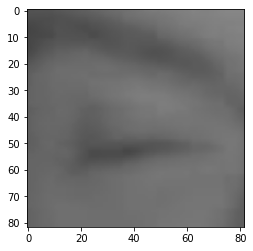

In [37]:
# input_img = cv2.imread('G:\Mtec_Final_year_project_research paper\datasets\mrlEyes_2018_01\open_eyes\s0003_00679_0_0_1_0_0_01.png', cv2.IMREAD_GRAYSCALE)
input_img = cv2.imread('C:/Users/Dell/Downloads/project/test_images/s0033_00009_0_0_0_0_1_01.png', cv2.IMREAD_GRAYSCALE)
# img_array=cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
input_image_backtorgb = cv2.cvtColor(input_img,cv2.COLOR_GRAY2RGB)
new_input_array = cv2.resize(input_image_backtorgb,(150,150))
new_input_array = np.array(new_input_array).reshape(-1,150,150,3)
new_image = new_input_array/255.0
plt.imshow(input_image_backtorgb)

In [39]:
prediction = model.predict(new_image)
prediction

array([[0.00809992]], dtype=float32)

array([[0.999964]], dtype=float32)

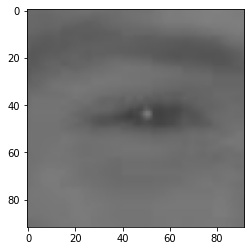

In [41]:
# input_img = cv2.imread('G:\Mtec_Final_year_project_research paper\datasets\mrlEyes_2018_01\open_eyes\s0003_00679_0_0_1_0_0_01.png', cv2.IMREAD_GRAYSCALE)
input_img = cv2.imread('C:/Users/Dell/Downloads/project/test_images/s0033_00017_0_0_0_0_1_01.png', cv2.IMREAD_GRAYSCALE)
# img_array=cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
input_image_backtorgb = cv2.cvtColor(input_img,cv2.COLOR_GRAY2RGB)
new_input_array = cv2.resize(input_image_backtorgb,(150,150))
new_input_array = np.array(new_input_array).reshape(-1,150,150,3)
new_image = new_input_array/255.0
plt.imshow(input_image_backtorgb)
prediction = model.predict(new_image)
prediction

array([[1.]], dtype=float32)

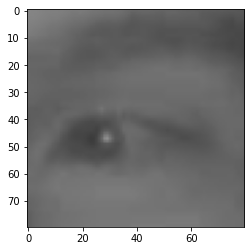

In [42]:
# input_img = cv2.imread('G:\Mtec_Final_year_project_research paper\datasets\mrlEyes_2018_01\open_eyes\s0003_00679_0_0_1_0_0_01.png', cv2.IMREAD_GRAYSCALE)
input_img = cv2.imread('C:/Users/Dell/Downloads/project/test_images/s0033_00160_0_0_1_0_1_01.png', cv2.IMREAD_GRAYSCALE)
# img_array=cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
input_image_backtorgb = cv2.cvtColor(input_img,cv2.COLOR_GRAY2RGB)
new_input_array = cv2.resize(input_image_backtorgb,(150,150))
new_input_array = np.array(new_input_array).reshape(-1,150,150,3)
new_image = new_input_array/255.0
plt.imshow(input_image_backtorgb)
prediction = model.predict(new_image)
prediction

array([[0.9797453]], dtype=float32)

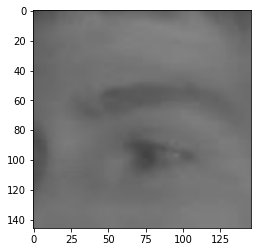

In [44]:
# input_img = cv2.imread('G:\Mtec_Final_year_project_research paper\datasets\mrlEyes_2018_01\open_eyes\s0003_00679_0_0_1_0_0_01.png', cv2.IMREAD_GRAYSCALE)
input_img = cv2.imread('C:/Users/Dell/Downloads/project/test_images/s0033_00184_0_0_1_0_1_01.png', cv2.IMREAD_GRAYSCALE)
# img_array=cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
input_image_backtorgb = cv2.cvtColor(input_img,cv2.COLOR_GRAY2RGB)
new_input_array = cv2.resize(input_image_backtorgb,(150,150))
new_input_array = np.array(new_input_array).reshape(-1,150,150,3)
new_image = new_input_array/255.0
plt.imshow(input_image_backtorgb)
prediction = model.predict(new_image)
prediction